In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import histogram

In [7]:
# Importing ISBG as dataframe
ISBG = pd.read_excel("./data/ISBSG-revised.xlsx")
ISBG.set_index("Project ID", inplace=True)

# Find standard data explortation below

In [8]:
ISBG.head()

,COSMIC Entry,COSMIC Exit,COSMIC Read,COSMIC Write,Functional Size,Relative Size
Project ID,,,,,,
15052,0,0,1,0,1,XXS
18690,1,0,0,0,1,XXS
29356,0,0,1,0,1,XXS
30954,1,0,0,0,1,XXS
12468,0,0,2,0,2,XXS


In [9]:
# Standard data exploration
print("ISBG info")
ISBG.info()
print("\n")
print("ISBG Described")
ISBG.describe()

ISBG info
<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 15052 to 16971
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   COSMIC Entry     250 non-null    int64 
 1   COSMIC Exit      250 non-null    int64 
 2   COSMIC Read      250 non-null    int64 
 3   COSMIC Write     250 non-null    int64 
 4   Functional Size  250 non-null    int64 
 5   Relative Size    250 non-null    object
dtypes: int64(5), object(1)
memory usage: 13.7+ KB


ISBG Described


,COSMIC Entry,COSMIC Exit,COSMIC Read,COSMIC Write,Functional Size
count,250.00000,250.00000,250.00000,250.000000,250.000000
mean,47.44800,52.56000,44.25200,24.668000,168.720000
std,93.32415,109.59864,75.39303,54.846315,289.133843
min,0.00000,0.00000,0.00000,0.000000,1.000000
25%,4.00000,2.00000,3.00000,1.000000,13.250000
50%,18.50000,14.00000,12.50000,7.000000,72.000000
75%,50.00000,52.50000,54.75000,25.750000,186.750000
max,908.00000,933.00000,545.00000,542.000000,2090.000000


# After finding out functional size is (mainly) composed of the sum of the other variables:

In [10]:
ISBG["sum"] = ISBG.apply(lambda row: row["COSMIC Entry"] + row["COSMIC Exit"] + row["COSMIC Read"] + row["COSMIC Write"], axis=1)


In [11]:
ISBG["Functional Size"]

Project ID
15052       1
18690       1
29356       1
30954       1
12468       2
         ... 
24703    1174
32273    1511
30426    1662
13229    1670
16971    2090
Name: Functional Size, Length: 250, dtype: int64

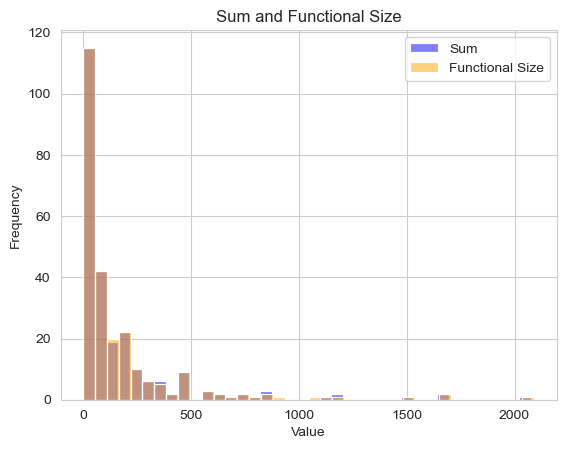

<Axes: xlabel='Project ID', ylabel='difference'>

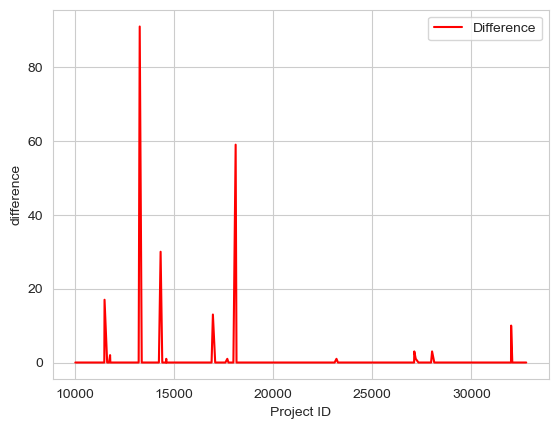

In [12]:
ISBG["difference"] = ISBG.apply(lambda row: abs(row.iloc[4] - row["sum"]),axis=1)
ISBG["difference"].describe()

sns.histplot(ISBG["sum"], alpha=0.5, color="blue", label="Sum")
sns.histplot(ISBG["Functional Size"], alpha=0.5, color="orange", label="Functional Size")

# Add labels and legend
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Sum and Functional Size")
plt.legend()

plt.show()
sns.lineplot(x=ISBG.index, y=ISBG["difference"], color="red", label="Difference")

In [13]:
# ISBG['difference'].sum()

np.int64(232)

# Graphical data exploration

<Axes: >

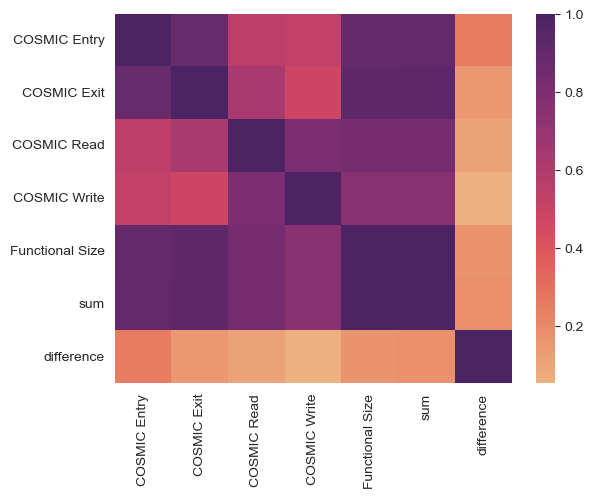

In [28]:
corr = ISBG.select_dtypes('int64').corr()
cmap = sns.color_palette("flare", as_cmap=True)
# plot the heatmap
sns.heatmap(corr,cmap=cmap)

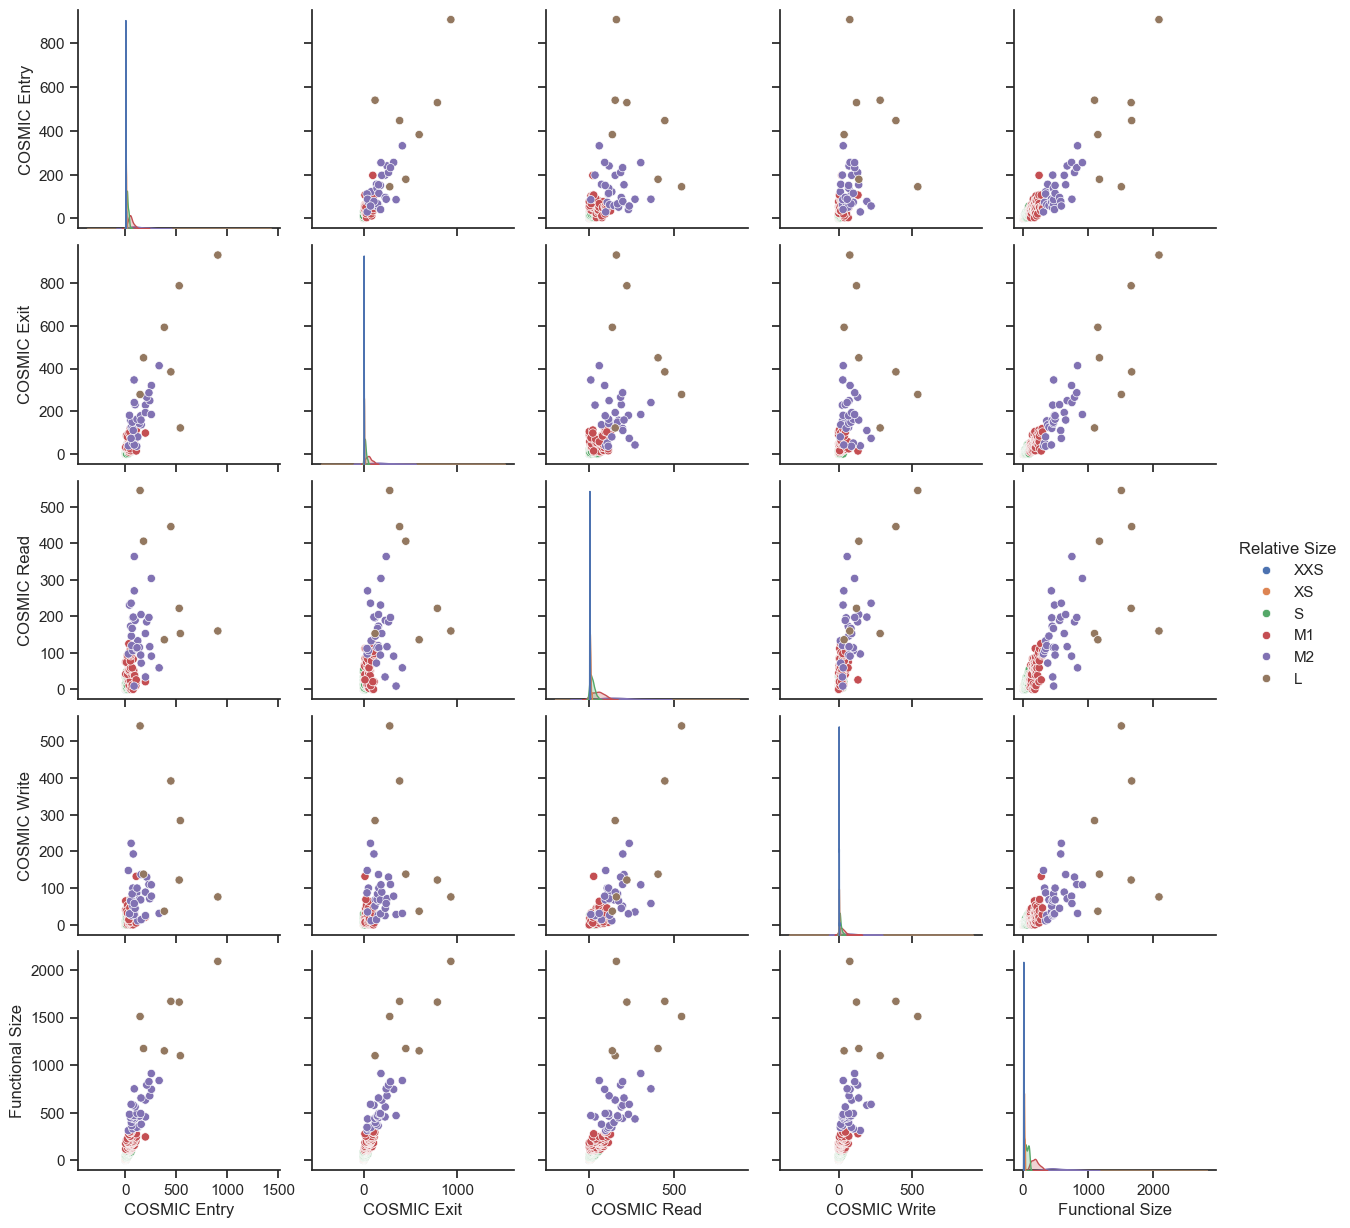

In [33]:
sns.set_theme(style="ticks")

sns.pairplot(ISBG, hue="Relative Size")

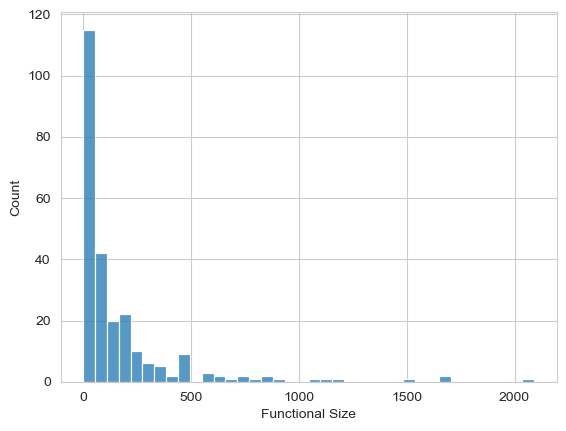

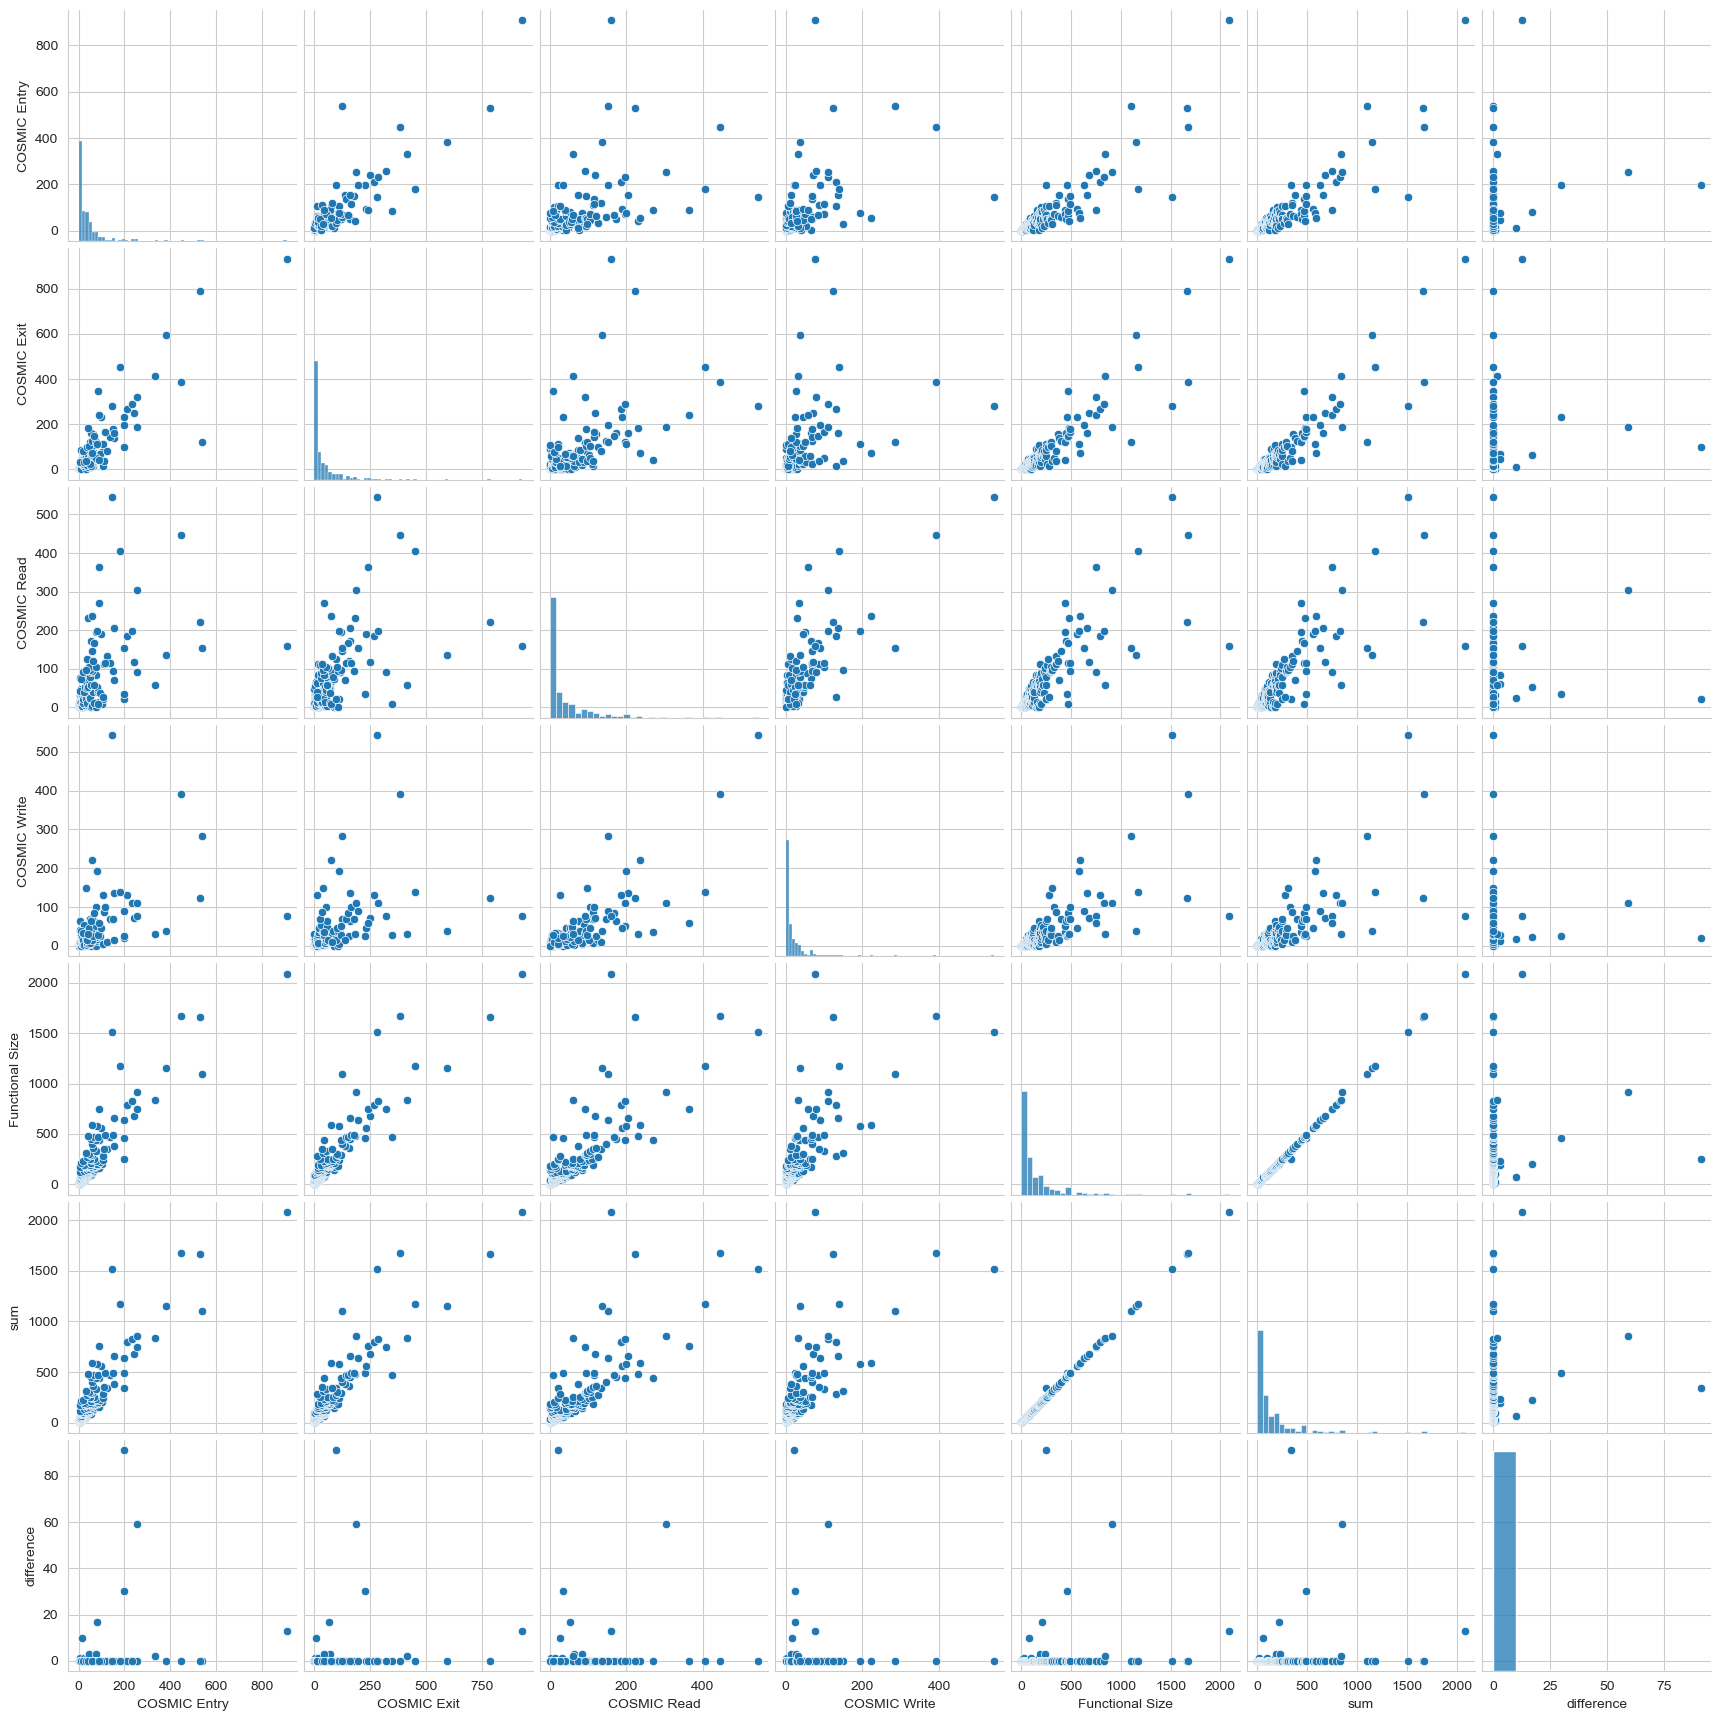

In [29]:
ISBG["Functional Size"].describe()

sns.histplot(ISBG["Functional Size"])
sns.pairplot(ISBG)